In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math
from ast import literal_eval
import re
from matplotlib import path


In [6]:
print()

<NA>


In [1]:
framesToWriteOn=100


In [4]:
framesToWriteOn-=1
framesToWriteOn

97

In [3]:
df=pd.read_csv('output/stickman_data_smoothed.csv')

In [4]:
df.head()

,nose_x,left_eye_x,right_eye_x,left_ear_x,right_ear_x,left_shoulder_x,right_shoulder_x,left_elbow_x,right_elbow_x,left_wrist_x,...,left_elbow_y,right_elbow_y,left_wrist_y,right_wrist_y,left_hip_y,right_hip_y,left_knee_y,right_knee_y,left_ankle_y,right_ankle_y
0,1033.991191,1033.647893,1028.318120,1014.294977,1017.817569,1037.901161,1023.571981,NaN,1017.335753,NaN,...,NaN,710.456923,NaN,693.358603,NaN,729.820820,NaN,765.243956,803.418035,802.387195
1,1029.117667,1030.137185,1024.216518,1020.537258,1016.761802,1037.468637,1022.855042,NaN,1018.189174,NaN,...,NaN,709.879846,NaN,691.267281,NaN,727.881010,760.119726,764.392882,803.061874,803.425169
2,1025.132586,1027.174674,1020.938865,1025.020830,1015.821180,1037.415039,1022.301165,NaN,1018.885450,NaN,...,NaN,709.276223,NaN,689.445701,NaN,726.645482,760.079808,763.338298,802.799826,803.894326
3,1022.035947,1024.760359,1018.485160,1027.745696,1014.995704,1037.740368,1021.910351,NaN,1019.424581,1018.461060,...,NaN,708.646056,681.064011,687.893863,NaN,726.114236,760.067397,762.080204,802.631891,803.794668
4,1019.717506,1022.854414,1016.719355,1029.625038,1014.237084,1038.799700,1021.618626,NaN,1019.860849,1018.355573,...,NaN,707.939270,681.178395,686.611006,NaN,727.352222,760.204239,760.482452,802.462133,802.977436


In [9]:
df3=[1,2,3,np.nan,np.nan]

In [7]:
for j in range(264,0,-1):
    left_eye_y=df.loc[j , "left_eye_y"]
    if (left_eye_y is not np.nan):
        break

In [8]:
left_eye_y

nan

In [7]:
x=None
print(x)

None


In [28]:
frame=cv2.imread('Frame1.png')
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
minLineLength = 100
maxLineGap = 20
# Detect all lines
lines = cv2.HoughLinesP(gray, 1, np.pi / 180, 80, minLineLength=minLineLength, maxLineGap=maxLineGap)
lines = np.squeeze(lines)

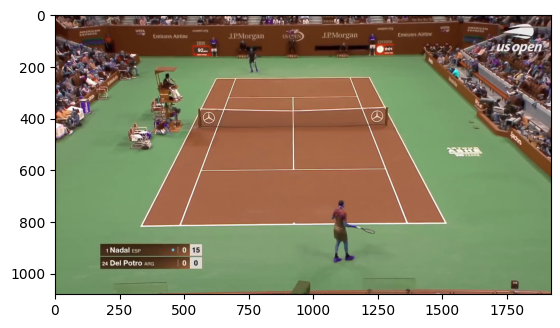

In [29]:
plt.imshow(frame)

In [30]:
len(lines)

1373

In [11]:
def display_lines_on_frame(frame, horizontal=(), vertical=()):
    """
    Display lines on frame for horizontal and vertical lines
    """

    '''cv2.line(frame, (int(len(frame[0]) * 4 / 7), 0), (int(len(frame[0]) * 4 / 7), 719), (255, 255, 0), 2)
    cv2.line(frame, (int(len(frame[0]) * 3 / 7), 0), (int(len(frame[0]) * 3 / 7), 719), (255, 255, 0), 2)'''
    for line in horizontal:
        x1, y1, x2, y2 = line
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.circle(frame, (x1, y1), 1, (255, 0, 0), 2)
        cv2.circle(frame, (x2, y2), 1, (255, 0, 0), 2)

    for line in vertical:
        x1, y1, x2, y2 = line
        cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.circle(frame, (x1, y1), 1, (255, 0, 0), 2)
        cv2.circle(frame, (x2, y2), 1, (255, 0, 0), 2)

    # cv2.imwrite('../report/t.png', frame)
    return frame

In [15]:
def _threshold(self, frame):
    """
    Simple thresholding for white pixels
    """
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]
    return gray

def _filter_pixels(self, gray):
    """
    Filter pixels by using the court line structure
    """
    for i in range(self.dist_tau, len(gray) - self.dist_tau):
        for j in range(self.dist_tau, len(gray[0]) - self.dist_tau):
            if gray[i, j] == 0:
                continue
            if (gray[i, j] - gray[i + self.dist_tau, j] > self.intensity_threshold and
                    gray[i, j] - gray[i - self.dist_tau, j] > self.intensity_threshold):
                continue

            if (gray[i, j] - gray[i, j + self.dist_tau] > self.intensity_threshold and
                    gray[i, j] - gray[i, j - self.dist_tau] > self.intensity_threshold):
                continue
            gray[i, j] = 0
    return gray

def _detect_lines(self, gray):
    """
    Finds all line in frame using Hough transform
    """
    minLineLength = 100
    maxLineGap = 20
    # Detect all lines
    lines = cv2.HoughLinesP(gray, 1, np.pi / 180, 80, minLineLength=minLineLength, maxLineGap=maxLineGap)
    lines = np.squeeze(lines)
    if self.verbose:
        display_lines_on_frame(self.frame.copy(), [], lines)

    # Classify the lines using their slope
    horizontal, vertical = self._classify_lines(lines)
    if self.verbose:
        display_lines_on_frame(self.frame.copy(), horizontal, vertical)

    # Merge lines that belong to the same line on frame
    horizontal, vertical = self._merge_lines(horizontal, vertical)
    if self.verbose:
        display_lines_on_frame(self.frame.copy(), horizontal, vertical)

    return horizontal, vertical

def _classify_lines(self, lines):
    """
    Classify line to vertical and horizontal lines
    """
    horizontal = []
    vertical = []
    highest_vertical_y = np.inf
    lowest_vertical_y = 0
    for line in lines:
        x1, y1, x2, y2 = line
        dx = abs(x1 - x2)
        dy = abs(y1 - y2)
        if dx > 2 * dy:
            horizontal.append(line)
        else:
            vertical.append(line)
            highest_vertical_y = min(highest_vertical_y, y1, y2)
            lowest_vertical_y = max(lowest_vertical_y, y1, y2)

    # Filter horizontal lines using vertical lines lowest and highest point
    clean_horizontal = []
    h = lowest_vertical_y - highest_vertical_y
    lowest_vertical_y += h / 15
    highest_vertical_y -= h * 2 / 15
    for line in horizontal:
        x1, y1, x2, y2 = line
        if lowest_vertical_y > y1 > highest_vertical_y and lowest_vertical_y > y1 > highest_vertical_y:
            clean_horizontal.append(line)
    return clean_horizontal, vertical

def _classify_vertical(self, vertical, width):
    """
    Classify vertical lines to right and left vertical lines using the location on frame
    """
    vertical_lines = []
    vertical_left = []
    vertical_right = []
    right_th = width * 4 / 7
    left_th = width * 3 / 7
    for line in vertical:
        x1, y1, x2, y2 = line
        if x1 < left_th or x2 < left_th:
            vertical_left.append(line)
        elif x1 > right_th or x2 > right_th:
            vertical_right.append(line)
        else:
            vertical_lines.append(line)
    return vertical_lines, vertical_left, vertical_right

def _merge_lines(self, horizontal_lines, vertical_lines):
    """
    Merge lines that belongs to the same frame`s lines
    """

    # Merge horizontal lines
    horizontal_lines = sorted(horizontal_lines, key=lambda item: item[0])
    mask = [True] * len(horizontal_lines)
    new_horizontal_lines = []
    for i, line in enumerate(horizontal_lines):
        if mask[i]:
            for j, s_line in enumerate(horizontal_lines[i + 1:]):
                if mask[i + j + 1]:
                    x1, y1, x2, y2 = line
                    x3, y3, x4, y4 = s_line
                    dy = abs(y3 - y2)
                    if dy < 10:
                        points = sorted([(x1, y1), (x2, y2), (x3, y3), (x4, y4)], key=lambda x: x[0])
                        line = np.array([*points[0], *points[-1]])
                        mask[i + j + 1] = False
            new_horizontal_lines.append(line)

    # Merge vertical lines
    vertical_lines = sorted(vertical_lines, key=lambda item: item[1])
    xl, yl, xr, yr = (0, self.v_height * 6 / 7, self.v_width, self.v_height * 6 / 7)
    mask = [True] * len(vertical_lines)
    new_vertical_lines = []
    for i, line in enumerate(vertical_lines):
        if mask[i]:
            for j, s_line in enumerate(vertical_lines[i + 1:]):
                if mask[i + j + 1]:
                    x1, y1, x2, y2 = line
                    x3, y3, x4, y4 = s_line
                    xi, yi = line_intersection(((x1, y1), (x2, y2)), ((xl, yl), (xr, yr)))
                    xj, yj = line_intersection(((x3, y3), (x4, y4)), ((xl, yl), (xr, yr)))

                    dx = abs(xi - xj)
                    if dx < 10:
                        points = sorted([(x1, y1), (x2, y2), (x3, y3), (x4, y4)], key=lambda x: x[1])
                        line = np.array([*points[0], *points[-1]])
                        mask[i + j + 1] = False

            new_vertical_lines.append(line)
    return new_horizontal_lines, new_vertical_lines

def _find_homography(self, horizontal_lines, vertical_lines):
    """
    Finds transformation from reference court to frame`s court using 4 pairs of matching points
    """
    max_score = -np.inf
    max_mat = None
    max_inv_mat = None
    k = 0
    # Loop over every pair of horizontal lines and every pair of vertical lines
    for horizontal_pair in list(combinations(horizontal_lines, 2)):
        for vertical_pair in list(combinations(vertical_lines, 2)):
            h1, h2 = horizontal_pair
            v1, v2 = vertical_pair
            # Finding intersection points of all lines
            i1 = line_intersection((tuple(h1[:2]), tuple(h1[2:])), (tuple(v1[0:2]), tuple(v1[2:])))
            i2 = line_intersection((tuple(h1[:2]), tuple(h1[2:])), (tuple(v2[0:2]), tuple(v2[2:])))
            i3 = line_intersection((tuple(h2[:2]), tuple(h2[2:])), (tuple(v1[0:2]), tuple(v1[2:])))
            i4 = line_intersection((tuple(h2[:2]), tuple(h2[2:])), (tuple(v2[0:2]), tuple(v2[2:])))

            intersections = [i1, i2, i3, i4]
            intersections = sort_intersection_points(intersections)

            for i, configuration in self.court_reference.court_conf.items():
                # Find transformation
                matrix, _ = cv2.findHomography(np.float32(configuration), np.float32(intersections), method=0)
                inv_matrix = cv2.invert(matrix)[1]
                # Get transformation score
                confi_score = self._get_confi_score(matrix)

                if max_score < confi_score:
                    max_score = confi_score
                    max_mat = matrix
                    max_inv_mat = inv_matrix
                    self.best_conf = i

                k += 1

    if self.verbose:
        frame = self.frame.copy()
        court = self.add_court_overlay(frame, max_mat, (255, 0, 0))
        cv2.imshow('court', court)
        if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()
    print(f'Score = {max_score}')
    print(f'Combinations tested = {k}')

    return max_mat, max_inv_mat, max_score

def _get_confi_score(self, matrix):
    """
    Calculate transformation score
    """
    court = cv2.warpPerspective(self.court_reference.court, matrix, self.frame.shape[1::-1])
    court[court > 0] = 1
    gray = self.gray.copy()
    gray[gray > 0] = 1
    correct = court * gray
    wrong = court - correct
    c_p = np.sum(correct)
    w_p = np.sum(wrong)
    return c_p - 0.5 * w_p

def line_intersection(line1, line2):
    """
    Find 2 lines intersection point
    """
    l1 = Line(line1[0], line1[1])
    l2 = Line(line2[0], line2[1])

    intersection = l1.intersection(l2)
    return intersection[0].coordinates

In [16]:
horizontal, vertical = _classify_lines(lines)

TypeError: _classify_lines() missing 1 required positional argument: 'lines'

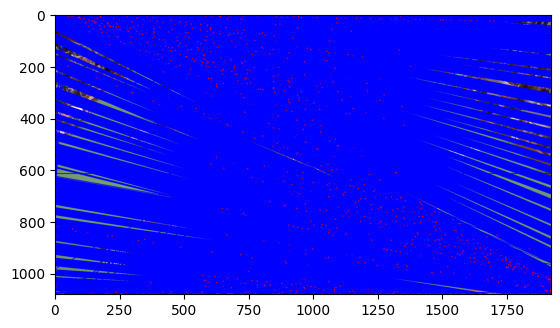

In [31]:
plt.imshow(display_lines_on_frame(frame.copy(), [], lines))

In [27]:
len(lines)

1373

In [15]:
player_1_strokes_indices = [73, 212, 365, 506, 685, 833, 990, 1130, 1283, 1443, 1630, 1806]
player_2_strokes_indices = [13, 158, 300, 437, 551, 596, 758, 1051, 1362, 1521, 1748, 1864]
bounces_indices= [ 119, 257 ,258 ,259 ,260 ,261, 262 ,263, 428 ,429, 430 ,431 ,432 ,591 ,592 ,593 ,594, 595,
 596 ,597 ,598 ,599, 600 ,742 ,743 ,744 ,745 ,746, 747, 748 ,851 ,852]
bounces2 = []

for x in range(len(bounces_indices)):
    if x == 0:
        bounces2.append(bounces_indices[x])
    elif bounces_indices[x] - bounces_indices[x-1] > 1:
        bounces2.append(bounces_indices[x])

top_base_line =  [649.6929, 224.0, 1262.0, 224.0]
bottom_base_line =[298.19626, 747.9939, 1623.3121, 747.0043]
left_line= [649.6929, 224.0, 298.19626, 747.9939]
right_line =[1262.0, 224.0, 1623.3121, 747.0043]
left_inner_line = [726.5, 224.0, 464.5652, 747.8696]
right_inner_line =  [1185.3102, 224.0, 1457.4924, 747.1281]
top_inner_line=  [694.54456, 287.91095, 1218.538, 287.8632]
bottom_inner_line=[567.87396, 541.25214, 1350.1915, 540.89825]
middle_line =[956.3193, 287.8871, 958.77344, 541.0753]

In [198]:
bounces2

[119, 257, 428, 591, 742, 851]

In [16]:
summary = pd.read_csv("summary.csv")

In [17]:
summary.head()

,Unnamed: 0,player1boxes,player2boxes,ballpositions,ballvelocities
0,0,"(729.0, 647.0, 873.0, 895.0)","(None, None, None, None)","(None, None)",0.00000
1,1,"(720.5602874755859, 651.5501251220703, 870.626...","(None, None, None, None)","(None, None)",0.00000
2,2,"(714.4875183105469, 651.5208129882812, 877.637...","(None, None, None, None)","(1038.0, 174.0)",0.00000
3,3,"(716.041748046875, 653.7132720947266, 873.0337...","(None, None, None, None)","(None, None)",390.11338
4,4,"(714.8642883300781, 653.4426574707031, 875.829...","(None, None, None, None)","(None, None)",282.21666


In [18]:
for index,row in summary.iterrows():
    x = summary.at[index,'player2boxes']
    z = literal_eval(x)
    summary.at[index,'player2boxes'] = tuple(z)
    

In [19]:
for index,row in summary.iterrows():
    x = summary.at[index,'ballpositions']
    z = literal_eval(x)
    summary.at[index,'ballpositions'] = tuple(z)
    

In [20]:
for index,row in summary.iterrows():
    x = summary.at[index,'player1boxes']
    z = literal_eval(x)
    summary.at[index,'player1boxes'] = tuple(z)
    

In [21]:
for index,row in summary.iterrows():
    if index<summary.shape[0]-1:
        firstPoint = summary.at[index , 'ballpositions']
        secondPoint = summary.at[index+1 , 'ballpositions' ]
        
        if firstPoint != (None , None) and secondPoint != (None , None):

            deltaX = secondPoint[0] - firstPoint[0]
            deltaY = secondPoint[1] - firstPoint[1]
            theta_radians = math.atan2(deltaY, deltaX)
            summary.at[index , 'angle'] = math.degrees(theta_radians)+360
            if summary.at[index , 'angle'] >= 360:
                summary.at[index , 'angle'] = summary.at[index , 'angle']-360


In [22]:
summary.head()

,Unnamed: 0,player1boxes,player2boxes,ballpositions,ballvelocities,angle
0,0,"(729.0, 647.0, 873.0, 895.0)","(None, None, None, None)","(None, None)",0.00000,NaN
1,1,"(720.5602874755859, 651.5501251220703, 870.626...","(None, None, None, None)","(None, None)",0.00000,NaN
2,2,"(714.4875183105469, 651.5208129882812, 877.637...","(None, None, None, None)","(1038.0, 174.0)",0.00000,NaN
3,3,"(716.041748046875, 653.7132720947266, 873.0337...","(None, None, None, None)","(None, None)",390.11338,NaN
4,4,"(714.8642883300781, 653.4426574707031, 875.829...","(None, None, None, None)","(None, None)",282.21666,NaN


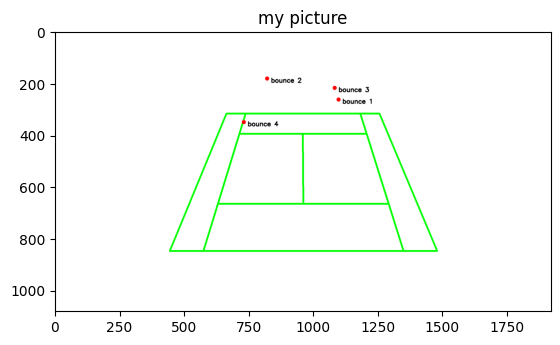

True

In [23]:
img = cv2.imread('ss.jpg')


cv2.line(img, ( 662  , 318 ), (1253  , 318 ) , (0, 255, 0), 5) # line1 top_baseline ----

cv2.line(img, ( 443 , 848 ), (1476 ,  848 ) , (0, 255, 0), 5) # line2 bottom_baseline -----

#cv2.line(img, (526, 452), (1403, 452) , (0, 255, 0), 5) #line3 middleline

cv2.line(img, (662 , 318), (443 ,848) , (0, 255, 0), 5) #line4 left_doubleline

cv2.line(img, (1253  , 318), (1476 ,  848) , (0, 255, 0), 5) #line5 right_doubleline

cv2.line(img, ( 736 ,318 ), (573 , 848) , (0, 255, 0), 5) #line6 left_singleline  -----

cv2.line(img, (1179  , 318), (1346 ,   848) ,(0, 255, 0), 5) #line7 right_singleline ------

cv2.line(img, (957, 396), ( 959 ,666) , (0, 255, 0), 5) #line8 center_serviceline

cv2.line(img, (712 , 396), (1203 , 396 ) , (0, 255, 0), 5) #line9 top_serviceline

cv2.line(img, ( 629,  666), (1289 , 666 ) , (0, 255, 0), 5) #line10 bottom_serviceline
font = cv2.FONT_HERSHEY_SIMPLEX

i = 1
for x in bounces2:
    bounce_point = summary.at[x , 'ballpositions']
    if bounce_point != (None , None):
        el= []
        el.append(round(bounce_point[0]))
        el.append(round(bounce_point[1]))
        cv2.circle(img , (el[0] , el[1]) , radius = 8 , color=(0, 0, 255), thickness=-1)
        cv2.putText(img , "bounce {0}".format(i) , (el[0]+15 , el[1]+15) , font , 0.8,(0, 0, 0) ,2, cv2.LINE_AA )
        i = i+1
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('my picture')
plt.show()
filename = "bouncesimage.jpg"
cv2.imwrite(filename , img)

In [24]:
def center_of_box(box):
    """
    Calculate the center of a box
    """
    if box[0] is None:
        return None, None
    height = box[3] - box[1]
    width = box[2] - box[0]
    return box[0] + width / 2, box[1] + height / 2

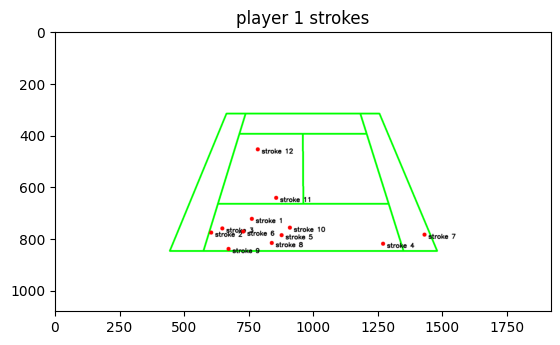

True

In [25]:
img = cv2.imread('ss.jpg')


cv2.line(img, ( 649  , 224 ), (1262  , 224 ) , (0, 255, 0), 5) # line1 top_baseline ----

cv2.line(img, ( 298 , 747 ), (1623 ,  747 ) , (0, 255, 0), 5) # line2 bottom_baseline -----

cv2.line(img, (956, 287), ( 958, 541) , (0, 255, 0), 5) #line3 middleline

cv2.line(img, (649 , 224), (298 ,747) , (0, 255, 0), 5) #line4 left_doubleline

cv2.line(img, (1262  , 224), (1623 ,  747) , (0, 255, 0), 5) #line5 right_doubleline

cv2.line(img, ( 726 ,224 ), (464 , 747) , (0, 255, 0), 5) #line6 left_singleline  -----

cv2.line(img, (1185  , 224), (1457 ,   747) ,(0, 255, 0), 5) #line7 right_singleline ------

#cv2.line(img, (957, 396), ( 959 ,666) , (0, 255, 0), 5) #line8 center_serviceline

cv2.line(img, (712 , 396), (1203 , 396 ) , (0, 255, 0), 5) #line9 top_serviceline

cv2.line(img, ( 629,  666), (1289 , 666 ) , (0, 255, 0), 5) #line10 bottom_serviceline
font = cv2.FONT_HERSHEY_SIMPLEX

i = 1
for n in player_1_strokes_indices:
    stroke1_point = summary.at[n , 'player1boxes']
    x,y = center_of_box(stroke1_point)
    cv2.circle(img , (round(x) , round(y)) , radius = 8 , color=(0, 0, 255), thickness=-1)
    cv2.putText(img , "stroke {0}".format(i) , (round(x)+15 , round(y)+15) , font , 0.8,(0, 0, 0) ,2, cv2.LINE_AA )
    i = i+1


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('player 1 strokes')
plt.show()
filename = "player1strokes.jpg"
cv2.imwrite(filename , img)

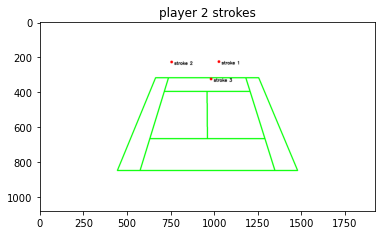

True

<Figure size 432x288 with 0 Axes>

In [189]:
img = cv2.imread('ss.jpg')


cv2.line(img, ( 662  , 318 ), (1253  , 318 ) , (0, 255, 0), 5) # line1 top_baseline ----

cv2.line(img, ( 443 , 848 ), (1476 ,  848 ) , (0, 255, 0), 5) # line2 bottom_baseline -----

#cv2.line(img, (526, 452), (1403, 452) , (0, 255, 0), 5) #line3 middleline

cv2.line(img, (662 , 318), (443 ,848) , (0, 255, 0), 5) #line4 left_doubleline

cv2.line(img, (1253  , 318), (1476 ,  848) , (0, 255, 0), 5) #line5 right_doubleline

cv2.line(img, ( 736 ,318 ), (573 , 848) , (0, 255, 0), 5) #line6 left_singleline  -----

cv2.line(img, (1179  , 318), (1346 ,   848) ,(0, 255, 0), 5) #line7 right_singleline ------

cv2.line(img, (957, 396), ( 959 ,666) , (0, 255, 0), 5) #line8 center_serviceline

cv2.line(img, (712 , 396), (1203 , 396 ) , (0, 255, 0), 5) #line9 top_serviceline

cv2.line(img, ( 629,  666), (1289 , 666 ) , (0, 255, 0), 5) #line10 bottom_serviceline
font = cv2.FONT_HERSHEY_SIMPLEX
i = 1
for n in player_2_strokes_indices:
    stroke1_point = summary.at[n , 'player2boxes']
    x,y = center_of_box(stroke1_point)
    cv2.circle(img , (round(x) , round(y)) , radius = 8 , color=(0, 0, 255), thickness=-1)
    cv2.putText(img , "stroke {0}".format(i) , (round(x)+15 , round(y)+15) , font , 0.8,(0, 0, 0) ,2, cv2.LINE_AA )
    i = i+1


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('player 2 strokes')
plt.show()
plt.savefig("player two strokes.eps" ,  format='eps')

filename = "player2strokes.jpg"
cv2.imwrite(filename , img)

In [190]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [191]:
first_point =  line_intersection([(bottom_base_line[0],bottom_base_line[1]), 
(bottom_base_line[2], bottom_base_line[3])],[(left_line[0], left_line[1]), (left_line[2], left_line[3])])
second_point = line_intersection([(left_line[0], left_line[1]), (left_line[2], left_line[3])],
[(top_base_line[0], top_base_line[1]), (top_base_line[2], top_base_line[3])])
third_point = line_intersection([(top_base_line[0], top_base_line[1]), (top_base_line[2], top_base_line[3])],
[(right_line[0], right_line[1]), (right_line[2], right_line[3])])
fourth_point = line_intersection([(right_line[0], right_line[1]), (right_line[2], right_line[3])],
[(bottom_base_line[0],bottom_base_line[1]), (bottom_base_line[2], bottom_base_line[3])])


for index,row in summary.iterrows():
    if summary.at[index , 'ballpositions'] != (None , None):
        p = path.Path([first_point, second_point, third_point, fourth_point])
        x = p.contains_points([(summary.at[index,'ballpositions'][0], summary.at[index,'ballpositions'][1])])[0]
        if x == True:
            summary.at[index,'ball_in_out'] = 'in'

        else:
            summary.at[index,'ball_in_out'] = 'out'


In [192]:
summary.head()

,Unnamed: 0,player1boxes,player2boxes,ballpositions,angle,ball_in_out
0,0,"(452.0, 735.0, 573.0, 955.0)","(1036.8551028951308, 175.42573638906876, 1086....","(None, None)",NaN,NaN
1,1,"(454.87518310546875, 734.5516815185547, 571.69...","(1036.850129208749, 175.50769421634027, 1086.6...","(None, None)",NaN,NaN
2,2,"(455.3143768310547, 734.5881500244141, 572.378...","(1034.7011126248644, 169.52615223189753, 1087....","(None, None)",NaN,NaN
3,3,"(453.38438415527344, 733.4178009033203, 573.21...","(1033.7002819277777, 162.26236113680903, 1088....","(None, None)",NaN,NaN
4,4,"(456.6232147216797, 733.0795135498047, 573.280...","(1032.5860927831732, 149.9931500121239, 1091.8...","(None, None)",NaN,NaN


In [193]:
summary["ball_in_out"].value_counts()

in     494
out    161
Name: ball_in_out, dtype: int64

In [194]:
for index,row in summary.iterrows():
    for x in bounces_indices:
        if index == x:
            if summary.at[index , "ball_in_out"] == "out":
                print("point lost")
                print(index)

In [2]:
x = [[('40', [[259.,  14.],
       [305.,  14.],
       [305.,  42.],
       [259.,  42.]], ), ('tsitsipas', [[ 19.839905,  10.221293],
       [149.4555  ,  20.321209],
       [147.01929 ,  51.585922],
       [ 17.403687,  41.486008]]), ('rublev', [[ 19.,  51.],
       [123.,  51.],
       [123.,  78.],
       [ 19.,  78.]]), ('40', [[259.,  51.],
       [305.,  51.],
       [305.,  78.],
       [259.,  78.]])]]

In [12]:
import numpy as np
x[0][0][1]
listofy = []
for  i in x[0]:
    
    print(i[1][0][1])
    listofy.append(i[1][0][1])
    print("--")

firstplayerscore = []
secondplayerscore = []
for i in x[0]:
    if i[1][0][1] < np.mean(listofy):
        firstplayerscore.append(i[0])
    else:
        secondplayerscore.append(i[0])

14.0
--
10.221293
--
51.0
--
51.0
--


In [10]:
np.mean(listofy)

31.55532325

In [13]:
firstplayerscore

['40', 'tsitsipas']

In [14]:
secondplayerscore

['rublev', '40']

In [17]:
firstplayerscore.sort(reverse=True)

In [18]:
firstplayerscore

['tsitsipas', '40']

In [21]:
secondplayerscore.sort(reverse=True)

In [22]:
secondplayerscore

['rublev', '40']

In [2]:
from tensorflow.python.client import device_lib


In [3]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17982717228259464164
xla_global_id: -1
]


In [4]:
import tensorflow as tf
sys_details = tf.sysconfig.get_build_info()
sys_details["cuda_version"]

'11.2'

In [5]:
tf. __version__

'2.11.0'

In [1]:
import torch
torch.cuda.empty_cache()

/home/smartcoach/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
print(list("ddd"))

['d', 'd', 'd']


In [4]:
z = str(50)
z

'50'

In [2]:
import pandas as pd
strokes_type = pd.read_csv("/home/smartcoach/Smart_coach/smartcoach/src/p1sdfm.csv")
strokes_type.head()


,Unnamed: 0,73,212,365,506,685,833,990,1130,1283,1443,1630,1806
0,0,forehand,backhand,forehand,forehand,backhand,backhand,forehand,backhand,forehand,backhand,backhand,backhand


In [5]:
rst_rec = strokes_type.iloc[0]
z = rst_rec.to_list()
z


[0,
 'forehand',
 'backhand',
 'forehand',
 'forehand',
 'backhand',
 'backhand',
 'forehand',
 'backhand',
 'forehand',
 'backhand',
 'backhand',
 'backhand']